In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Limits and Derivatives
**Instructor:** Isidora Rojas\
**TAs:** Joey Carter and Lauren Harvey

## Learning Objectives
- Explain a limit and use it to define the derivative
- Compute derivatives using power, product, quotient, and chain rule
- Understand and identify different forms of differnetiation notation 
- Apply derivative rules to oceanographic problems

## Limits


<img src="https://tse2.mm.bing.net/th/id/OIP.EuCOqyiMNgT6qq9cbQzstQHaGc?pid=Api" alt="Cady Heron" width="400"/>



We say that the limit of $ f(x) $ is $L$ as $x$ approaches $a$ and write this as:

$$\lim_{x \to a} f(x) = L$$

This means we can make $f(x)$ as close to $L$ as we want for all $x$ sufficiently close to $a$, from both sides, without actually letting $x$ be $a$.

**Simple Example:**

$$\lim_{x \to 10} \frac{x}{2} = 5$$

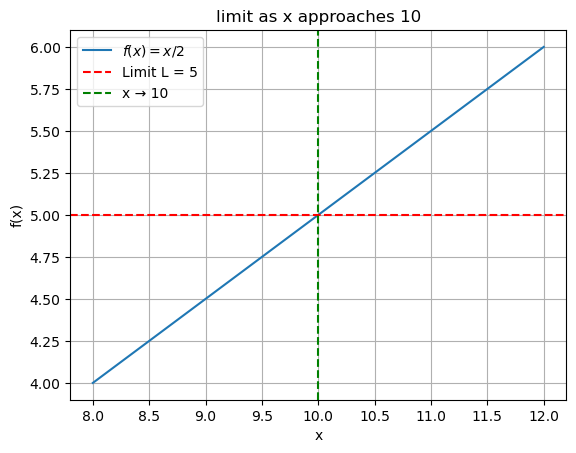

In [2]:
x = np.linspace(8, 12, 200)
y = x/2

plt.plot(x, y, label="$f(x) = x/2$")
plt.axhline(5, color="red", linestyle="--", label="Limit L = 5")
plt.axvline(10, color="green", linestyle="--", label="x → 10")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.title("limit as x approaches 10")
plt.show()

### Kinds of Limits 
Note: this will not be covered during workshop time but is intended to be used as a reference


1. **Two-sided limit**  
   $\lim_{x \to a} f(x) = L$
   Requires $f(x)$ to approach the same $L$ from both the left ($x \to a^-$) and the right ($x \to a^+$).

2. **One-sided limits**  
   - Left-hand limit:  
    $\lim_{x \to a^-} f(x) = L$
   - Right-hand limit:  
     $\lim_{x \to a^+} f(x) = L$

3. **Limits at infinity**  
   - $\lim_{x \to \infty} f(x)$ 
   - $\lim_{x \to -\infty} f(x)$  
   Used to describe asymptotic behavior.

4. **Infinite limits**  
   - $\lim_{x \to a} f(x) = \infty$  
   Means $f(x)$ grows without bound as $x$ approaches $a$.



---

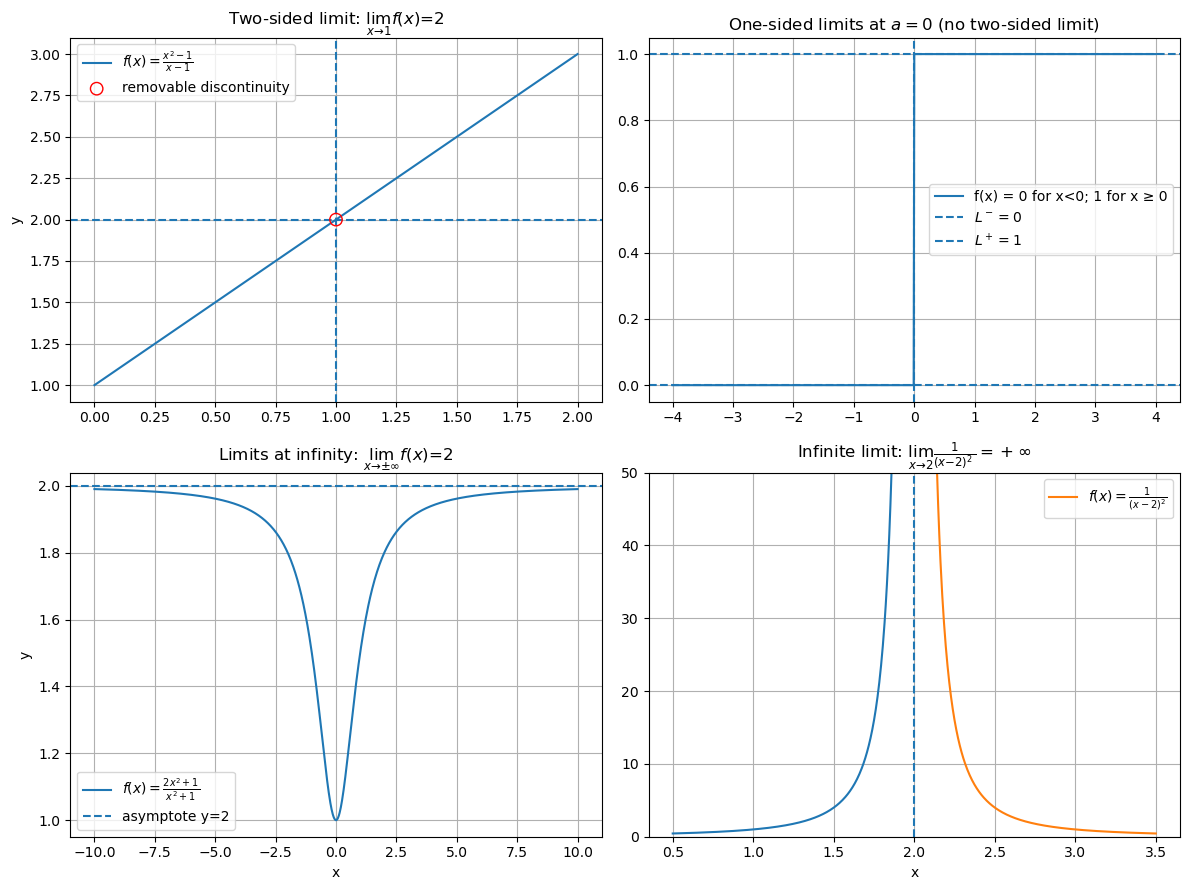

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# two-sided limit:
ax = axes[0, 0]
a = 1.0
x = np.linspace(0, 2, 600)
y = (x**2 - 1) / (x - 1)           # equals x+1 for x != 1
y[np.isclose(x, a, atol=1e-6)] = np.nan  # hide the undefined point
ax.plot(x, y, label=r"$f(x)=\frac{x^2-1}{x-1}$")
ax.axvline(a, linestyle="--")                 # approach point
ax.axhline(2, linestyle="--")                 # limit value
ax.scatter([a], [2], facecolors="none", edgecolors="red", s=80, zorder=3,
           label="removable discontinuity")
ax.set_title("Two-sided limit: $\\lim_{x\\to 1} f(x) = 2$")
ax.grid(True)
ax.legend(loc="best")

# one-sided limits: step (different left/right limits at a=0)
ax = axes[0, 1]
a = 0.0
x = np.linspace(-4, 4, 801)
f = np.where(x < 0, 0.0, 1.0)
ax.plot(x, f, label="f(x) = 0 for x<0; 1 for x ≥ 0")
ax.axvline(a, linestyle="--")
ax.axhline(0, linestyle="--", label=r"$L^- = 0$")
ax.axhline(1, linestyle="--", label=r"$L^+ = 1$")
ax.set_title("One-sided limits at $a=0$ (no two-sided limit)")
ax.grid(True)
ax.legend(loc="best")

# limits at infinity- horizontal asymptote
ax = axes[1, 0]
x = np.linspace(-10, 10, 1201)
f = (2*x**2 + 1) / (x**2 + 1)
ax.plot(x, f, label=r"$f(x)=\frac{2x^2+1}{x^2+1}$")
ax.axhline(2, linestyle="--", label="asymptote y=2")
ax.set_title(r"Limits at infinity: $\lim_{x\to\pm\infty} f(x)=2$")
ax.grid(True)
ax.legend(loc="best")

# infinite limit at a point: vertical asymptote
#    f(x) = 1/(x-2)^2 -> +∞ as x -> 2
ax = axes[1, 1]
a = 2.0

x_left  = np.linspace(0.5, 1.95, 400)
x_right = np.linspace(2.05, 3.5, 400)
f_left  = 1.0 / (x_left - a)**2
f_right = 1.0 / (x_right - a)**2
ax.plot(x_left, f_left)
ax.plot(x_right, f_right, label=r"$f(x)=\frac{1}{(x-2)^2}$")
ax.axvline(a, linestyle="--")                 # vertical asymptote
ax.set_ylim(0, min(50, max(f_left.max(), f_right.max())))  # keep plot readable
ax.set_title(r"Infinite limit: $\lim_{x\to 2} \frac{1}{(x-2)^2}=+\infty$")
ax.grid(True)
ax.legend(loc="best")

for ax in axes[1, :]:
    ax.set_xlabel("x")
for ax in axes[:, 0]:
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()


## Derivatives

The derivative represents the *instantaneous rate of change* of a function.

- **Secant slope** = average rate of change between two points.
- **Tangent slope** = instantaneous rate of change.

Definition of derivative:

$$f'(x) = \lim_{h \to 0}\frac{f(x+h) - f(x)}{h}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

f = lambda x: x**2
df = lambda x: 2*x

x = np.linspace(-5, 5, 400)
y = f(x)

@widgets.interact(x0=(-4.0, 4.0, 0.1))
def tangent_plot(x0=1):
    plt.figure(figsize=(6,4))
    plt.plot(x, y, label="$f(x) = x^2$")
    plt.scatter([x0], [f(x0)], color="red")
    plt.ylim(0,25)
    plt.title(f"Point of tangency at x={x0}, f({x0})={f(x0)}")
    
    # tangent line
    slope = df(x0)
    tangent = slope*(x - x0) + f(x0)
    plt.plot(x, tangent, "--", label=f"Tangent at x={x0}, slope={slope:.2f}")
    plt.ylim(0, 25)

    plt.legend()
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='x0', max=4.0, min=-4.0), Output()), _dom_classes=('w…

### Derivative Rules Cheat Sheet

- Power Rule: $\frac{d}{dx}[x^n] = nx^{n-1}$
- Constant Rule: $\frac{d}{dx}[c] = 0$
- Sum Rule: $\frac{d}{dx}[f+g] = f' + g'$
- Product Rule: $\frac{d}{dx}[fg] = f'g + fg'$
- Quotient Rule: $\frac{d}{dx}\left[\frac{f}{g}\right] = \frac{f'g - fg'}{g^2}$
- Chain Rule: $\frac{d}{dx}[f(g(x))] = f'(g(x)) \cdot g'(x)$
- Exponential: $\frac{d}{dx}[e^x] = e^x$, $\;\;\frac{d}{dx}[a^x] = a^x\ln(a)$
- Logarithm: $\frac{d}{dx}[\ln(x)] = \frac{1}{x}$
- Trigonometric:  
  $\frac{d}{dx}[\sin(x)] = \cos(x)$,  
  $\frac{d}{dx}[\cos(x)] = -\sin(x)$,  
  $\frac{d}{dx}[\tan(x)] = \sec^2(x)$



### Useful Derivatives

$ \frac{d}{dx}(x) = 1 $

$ \frac{d}{dx}(\sin x) = \cos x $

$ \frac{d}{dx}(\cos x) = -\sin x $

$ \frac{d}{dx}(\tan x) = \sec^2 x $

$ \frac{d}{dx}(\cot x) = -\csc^2 x $

$ \frac{d}{dx}(\sec x) = \sec x \tan x $

$ \frac{d}{dx}(\csc x) = -\csc x \cot x $

$ \frac{d}{dx}(\sin^{-1} x) = \frac{1}{\sqrt{1-x^2}} $

$ \frac{d}{dx}(\cos^{-1} x) = -\frac{1}{\sqrt{1-x^2}} $

$ \frac{d}{dx}(\tan^{-1} x) = \frac{1}{1+x^2} $

$ \frac{d}{dx}(\ln(x)) = \frac{1}{x}, \; x > 0 $

$ \frac{d}{dx}(\ln|x|) = \frac{1}{x}, \; x \neq 0 $

$ \frac{d}{dx}(\log_a(x)) = \frac{1}{x \ln(a)}, \; x > 0 $

$ \frac{d}{dx}(e^x) = e^x $

$ \frac{d}{dx}(a^x) = a^x \ln(a) $



## Derivative Notation


There are severl common notations for derivatives:

| Notation Type  | Example        | Context                        |
|----------------|---------------|--------------------------------|
| Lagrange       | $f'(x), f''(x)$ | General functions              |
| Leibniz        | $\frac{dy}{dx}, \frac{d^2y}{dx^2}$ | Differential equations, rigor  |
| Newton         | $\dot{y}, \ddot{y}$ | Physics, time derivatives      |
| Euler          | $Df(x)$         | Operator form                  |
| Partial        | $\frac{\partial f}{\partial x} , \frac{\partial^2 f}{\partial x^2}$| Multivariable calculus         |

## Practice Problems

Using the derivative rules (power, product, quotient, chain, exponential, logarithmic, trigonometric), solve the following:


#### 1. What is the instantaneous rate of change at $x=2$ of $f(x)=\frac{x^2-2}{x-1}$

##### solution:

Steps

- Use the quotient rule: if $f=\dfrac{u}{v}$ then $f'=\dfrac{u'v-uv'}{v^2}$ with $u=x^2-2$, $v=x-1$.

- Compute $u'=2x$, $v'=1$.

- Substitute and simplify, then evaluate at $x=2$.

- Work
$,f'(x)=\dfrac{(2x)(x-1)-(x^2-2)(1)}{(x-1)^2}
=\dfrac{x^2-2x+2}{(x-1)^2}.$
So $,f'(2)=\dfrac{4-4+2}{1}=2.$

In [5]:
x = np.linspace(1.5, 2.5, 1000)
f = (x**2 - 2) / (x - 1)

# compute derivative
dfdx = np.gradient(f, x)           

# solve at x=2
x0 = 2.0
idx = (np.abs(x - x0)).argmin()     
print("f'(2) ≈", dfdx[idx])

f'(2) ≈ 1.9990007500003912


#### 2. What is the derivative on $sin(e^{-x})$?

##### solution:

- Let $u=e^{-x}$. Use the chain rule: $(\sin u)'=\cos u\cdot u'$.

- Compute $u'=-e^{-x}$.

In [6]:
x = sp.symbols('x')
f = sp.sin(sp.exp(-x))
dfdx = sp.diff(f, x)
print("f(x) = ", f)
print("f'(x) =", dfdx)

f(x) =  sin(exp(-x))
f'(x) = -exp(-x)*cos(exp(-x))


#### 3. What is the derivative of $ \frac{d^2}{dx^2} e^{ix}$, where $i=\sqrt{-1}$?

##### solution:

- First derivative by chain rule: $(e^{ix})'=i,e^{ix}$.

- Differentiate again: $(i,e^{ix})'=i(i,e^{ix})=i^2 e^{ix}=-e^{ix}$.

In [7]:
x = sp.symbols('x')
f = sp.exp(sp.I*x)
dfdx = sp.diff(f,x)
d2fx2 = sp.diff(dfdx,x)

print("f(x) =", f )
print("f '(x) =", dfdx)
print("f''(x) =", d2fx2)


f(x) = exp(I*x)
f '(x) = I*exp(I*x)
f''(x) = -exp(I*x)


#### 4. What is the max acceleration on interval $ 0 \le t \le 3$ if a particle's position is given by $$ s(t) = t^3 - 3t^2 + 12t + 4?

#### solution:

- Velocity: $v(t)=s'(t)=3t^2-6t+12$.

- Acceleration: $a(t)=v'(t)=6t-6$.

- To maximize $a$ on a closed interval, check critical points of $a$ (solve $a'(t)=0$) and the endpoints $t=0,3$.

- Here $a'(t)=6>0$ (no interior extrema), so $a$ is increasing; max occurs at the right endpoint.

In [8]:
t = sp.symbols('t')
s = t**3 - 3*t**2 + 12*t + 4

v = sp.diff(s, t)
a = sp.diff(v, t)

s_func = sp.lambdify(t, s, 'numpy')
v_func = sp.lambdify(t, v, 'numpy')
a_func = sp.lambdify(t, a, 'numpy')

t_vals = np.linspace(0, 3, 200)
s_vals = s_func(t_vals)
v_vals = v_func(t_vals)
a_vals = a_func(t_vals)

max_accel = a_vals.max()

print("Max acceleration on [0,3]:", max_accel)

Max acceleration on [0,3]: 12.0


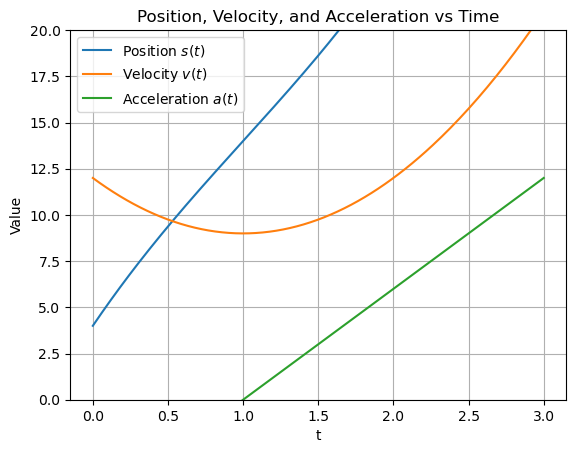

In [9]:

plt.plot(t_vals, s_vals, label="Position $s(t)$")
plt.plot(t_vals, v_vals, label="Velocity $v(t)$")
plt.plot(t_vals, a_vals, label="Acceleration $a(t)$")

plt.xlabel("t")
plt.ylabel("Value")
plt.ylim(0, 20)
plt.title("Position, Velocity, and Acceleration vs Time")
plt.legend()
plt.grid(True)
plt.show()



#### 5. A wave height is given by $H(t) = \sin(2t)$. Find the rate of change of height at $t = \pi/6$.

#### solution:



- Differentiate: $H'(t)=2\cos(2t)$ (chain rule).

- Plug in $t=\pi/6$: $2t=\pi/3$, $\cos(\pi/3)=1/2$.

### ❗ Bonus Question: Mean Girls limit problem ❗

Solve the question asked to Cady Heron at the end of Mean Girls:

<img src="https://i.ytimg.com/vi/vtUnHqb_rfw/maxresdefault.jpg" alt="Cady Heron" width="400"/>

Hint: L'hopital's rule:



$$
\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)}
$$



#### solution:

**LIMIT DOES NOT EXIST**